L910v13_Walnut_Adjusted_Plot_Analysis_From_PKL starting...
Output directory: C:\Users\mremp\00HA1py\out\walnut_plots_20250911_152322
Timestamp: 2025-09-11 15:23:22 PDT

Loading data from: C:\Users\mremp\00HA1py\post\hotco\250910_R622v6_Walnut_SpecPlot_6Plots_results\250910_R622v6_Walnut_SpecPlot_6Plots_results.pkl
Loaded data for Walnut dataset
Total pairs: 694,748
Number of sliding windows: 21
Number of TE families with data: 30
Center window index: 10

Top 6 TE families by total counts: MIRb, MIR, L2b_3end, L2, L2c_3end, AluSx
Total families for panel 6 analysis: 26
Center window median counts - Hot: 2079, Cold: 3916

DATA TABLES FOR PANELS

Panels 1-2: Homotypic Contacts - Hot and Cold Combined (MIRb adjusted by 0.65)
--------------------------------------------------------------------------------
Window     Distance(kb) MIRb_Hot     MIRb_Cold    MIR_Hot      MIR_Cold     L2b_3end_Hot L2b_3end_Cold L2_Hot       L2_Cold      L2c_3end_Hot L2c_3end_Cold AluSx_Hot    AluSx_Cold  
0     

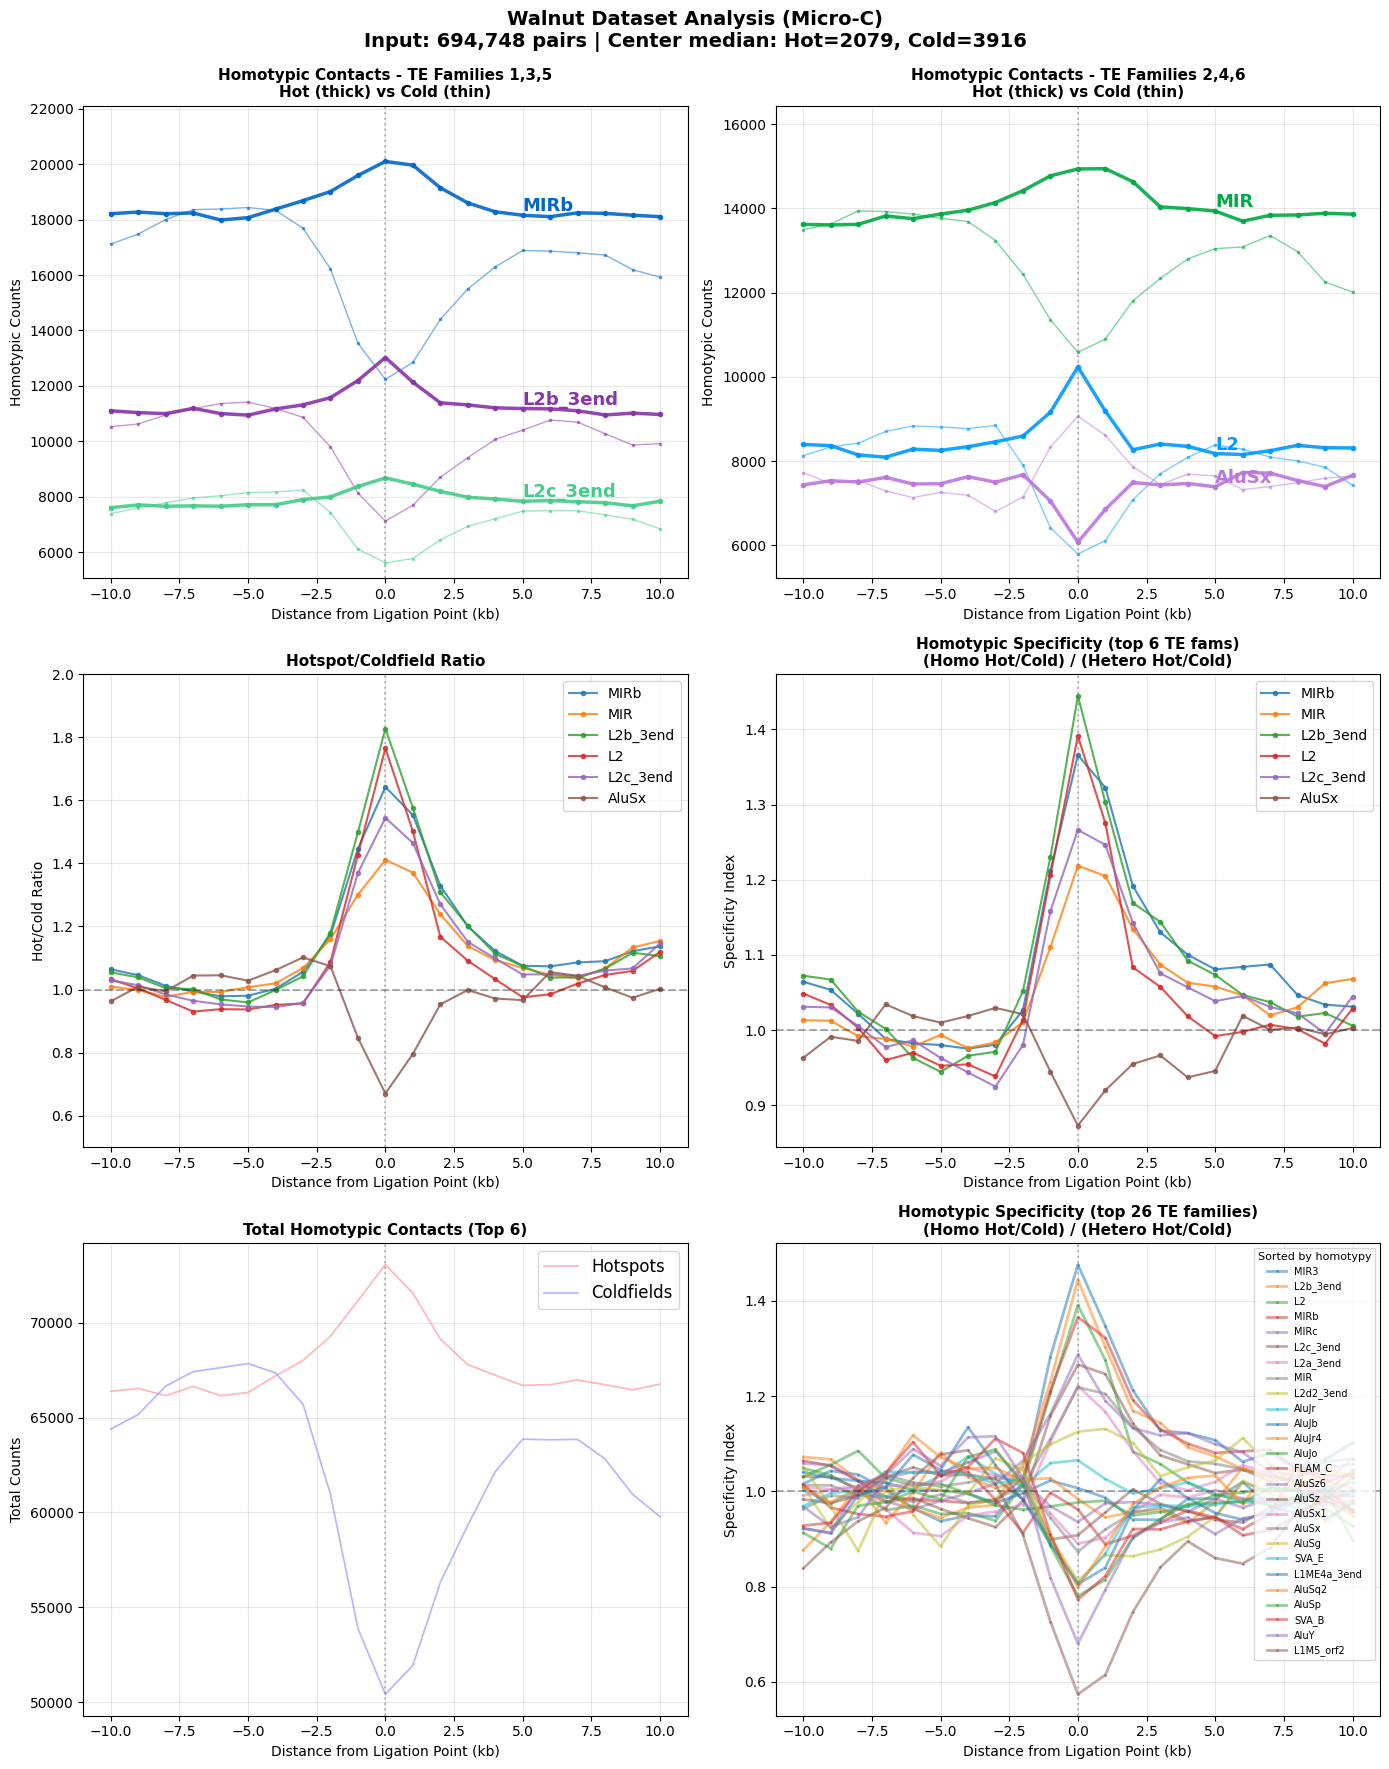


CENTER WINDOW STATISTICS - Panel 6 Specificity (Top 26 Families)
TE Family    Specificity     Interpretation                
--------------------------------------------------------------------------------
MIR3         1.48            Strong homotypic specificity  
L2b_3end     1.44            Strong homotypic specificity  
L2           1.39            Strong homotypic specificity  
MIRb         1.37            Strong homotypic specificity  
MIRc         1.29            Strong homotypic specificity  
L2c_3end     1.27            Strong homotypic specificity  
L2a_3end     1.22            Strong homotypic specificity  
MIR          1.22            Strong homotypic specificity  
L2d2_3end    1.13            Moderate homotypic specificity
AluJr        1.07            Moderate homotypic specificity
AluJb        1.01            No specificity                
AluJr4       0.98            No specificity                
AluJo        0.98            No specificity                
FLAM_C       

In [1]:
# L910v13_Walnut_Adjusted_Plot_Analysis_From_PKL# Previous version: L910v12# cchat: current chatscript_name = "L910v13_Walnut_Adjusted_Plot_Analysis_From_PKL"v_version = 13import osimport sysimport pickleimport numpy as npimport matplotlib.pyplot as pltfrom collections import defaultdictfrom datetime import datetime# Set up logging to both console and fileoutput_dir = f"C:\\Users\\mremp\\00HA1py\\out\\walnut_plots_{datetime.now().strftime('%Y%m%d_%H%M%S')}"os.makedirs(output_dir, exist_ok=True)log_file = os.path.join(output_dir, f"{script_name}.log")class DualOutput:    def __init__(self, file_path):        self.terminal = sys.stdout        self.log = open(file_path, 'a')    def write(self, message):        self.terminal.write(message)        self.log.write(message)        self.log.flush()    def flush(self):        self.terminal.flush()        self.log.flush()sys.stdout = DualOutput(log_file)print(f"{script_name} starting...")print(f"Output directory: {output_dir}")print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S PDT')}")print("="*80)# Load the pickle filepkl_path = "C:\\Users\\mremp\\00HA1py\\post\\hotco\\250910_R622v6_Walnut_SpecPlot_6Plots_results\\250910_R622v6_Walnut_SpecPlot_6Plots_results.pkl"print(f"\nLoading data from: {pkl_path}")with open(pkl_path, 'rb') as f:    data = pickle.load(f)# Extract all componentshot_homo_counts = data['hot_homo_counts']cold_homo_counts = data['cold_homo_counts']hot_hetero_counts = data['hot_hetero_counts']cold_hetero_counts = data['cold_hetero_counts']specificity_results = data['specificity_results']n_pairs = data['n_pairs']dataset_name = data['dataset']sliding_bins = data['sliding_windows']center_data = data['center_data']print(f"Loaded data for {dataset_name} dataset")print(f"Total pairs: {n_pairs:,}")print(f"Number of sliding windows: {len(sliding_bins)}")print(f"Number of TE families with data: {len(specificity_results)}")# Find center window indexcenter_idx = -1for i, (start, end, _) in enumerate(sliding_bins):    if start == -1000 and end == 1000:        center_idx = i        breakprint(f"Center window index: {center_idx}")# Get top families by total countsfamily_totals = []for family, spec_data in specificity_results.items():    total = sum(spec_data[i]['hot_homo'] + spec_data[i]['cold_homo'] for i in range(len(sliding_bins)))    family_totals.append((family, total))family_totals.sort(key=lambda x: x[1], reverse=True)top_families = [f for f, _ in family_totals[:6]]all_families = [f for f, _ in family_totals[:26]]  # Get top 26 families (excluding bottom 4)print(f"\nTop 6 TE families by total counts: {', '.join(top_families)}")print(f"Total families for panel 6 analysis: {len(all_families)}")# Calculate median pairs in center windowif center_data:    median_hot = np.median([x[1] for x in center_data])    median_cold = np.median([x[2] for x in center_data])else:    median_hot = median_cold = 0print(f"Center window median counts - Hot: {median_hot:.0f}, Cold: {median_cold:.0f}")# Print data tables before plotsprint("\n" + "="*80)print("DATA TABLES FOR PANELS")print("="*80)# Calculate distances for x-axisdistances = []for start, end, _ in sliding_bins:    center_pos = (start + end) / 2000  # Convert to kb    distances.append(center_pos)# Panel 1 data table - combined hot and coldprint("\nPanels 1-2: Homotypic Contacts - Hot and Cold Combined (MIRb adjusted by 0.65)")print("-"*80)print(f"{'Window':<10} {'Distance(kb)':<12}", end="")for family in top_families:    print(f" {family+'_Hot':<12} {family+'_Cold':<12}", end="")print()for i, dist in enumerate(distances):    print(f"{i:<10} {dist:<12.1f}", end="")    for family in top_families:        hot_value = specificity_results[family][i]['hot_homo']        cold_value = specificity_results[family][i]['cold_homo']        if family == 'MIRb':            hot_value = hot_value * 0.65            cold_value = cold_value * 0.65        print(f" {hot_value:<12.0f} {cold_value:<12.0f}", end="")    print()# Create improved 6-panel figure - NOW 3x2 layoutfig = plt.figure(figsize=(14, 18))  # Taller figure for 3 rows# Define colors for the 6 families - blue, green, purple shadescolors = {    top_families[0]: '#0066CC',  # Blue    top_families[1]: '#00AA44',  # Green      top_families[2]: '#8833AA',  # Purple    top_families[3]: '#0099FF',  # Light blue    top_families[4]: '#44CC88',  # Light green    top_families[5]: '#BB77DD',  # Light purple}# Split families for left and right panelsleft_families = [top_families[0], top_families[2], top_families[4]]  # 1st, 3rd, 5thright_families = [top_families[1], top_families[3], top_families[5]]  # 2nd, 4th, 6th# Panel 1: Combined hot/cold for families 1,3,5 (row 1, left)ax1 = plt.subplot(3, 2, 1)max_y1 = 0min_y1 = float('inf')for family in left_families:    hot_counts = [specificity_results[family][i]['hot_homo'] for i in range(len(sliding_bins))]    cold_counts = [specificity_results[family][i]['cold_homo'] for i in range(len(sliding_bins))]    if family == 'MIRb':        hot_counts = [c * 0.65 for c in hot_counts]        cold_counts = [c * 0.65 for c in cold_counts]        max_y1 = max(max_y1, max(hot_counts), max(cold_counts))    min_y1 = min(min_y1, min(hot_counts), min(cold_counts))        # Hot - thick line    ax1.plot(distances, hot_counts, color=colors[family], linewidth=2.5, alpha=0.9, marker='o', markersize=3)    # Cold - thin line    ax1.plot(distances, cold_counts, color=colors[family], linewidth=1.0, alpha=0.5, marker='s', markersize=2)        # Add family name on the hot curve with larger font    label_idx = len(distances) * 3 // 4    ax1.text(distances[label_idx], hot_counts[label_idx], family, fontsize=13,              color=colors[family], ha='left', va='bottom', weight='bold')ax1.axvline(x=0, color='gray', linestyle=':', alpha=0.5)ax1.set_xlabel('Distance from Ligation Point (kb)')ax1.set_ylabel('Homotypic Counts')ax1.set_title('Homotypic Contacts - TE Families 1,3,5\nHot (thick) vs Cold (thin)', fontsize=11, fontweight='bold')ax1.grid(True, alpha=0.3)ax1.set_ylim([min_y1 * 0.9, max_y1 * 1.1])# Panel 2: Combined hot/cold for families 2,4,6 (row 1, right)ax2 = plt.subplot(3, 2, 2)max_y2 = 0min_y2 = float('inf')for family in right_families:    hot_counts = [specificity_results[family][i]['hot_homo'] for i in range(len(sliding_bins))]    cold_counts = [specificity_results[family][i]['cold_homo'] for i in range(len(sliding_bins))]    if family == 'MIRb':        hot_counts = [c * 0.65 for c in hot_counts]        cold_counts = [c * 0.65 for c in cold_counts]        max_y2 = max(max_y2, max(hot_counts), max(cold_counts))    min_y2 = min(min_y2, min(hot_counts), min(cold_counts))        # Hot - thick line    ax2.plot(distances, hot_counts, color=colors[family], linewidth=2.5, alpha=0.9, marker='o', markersize=3)    # Cold - thin line    ax2.plot(distances, cold_counts, color=colors[family], linewidth=1.0, alpha=0.5, marker='s', markersize=2)        # Add family name on the hot curve with larger font    label_idx = len(distances) * 3 // 4    ax2.text(distances[label_idx], hot_counts[label_idx], family, fontsize=13,             color=colors[family], ha='left', va='bottom', weight='bold')ax2.axvline(x=0, color='gray', linestyle=':', alpha=0.5)ax2.set_xlabel('Distance from Ligation Point (kb)')ax2.set_ylabel('Homotypic Counts')ax2.set_title('Homotypic Contacts - TE Families 2,4,6\nHot (thick) vs Cold (thin)', fontsize=11, fontweight='bold')ax2.grid(True, alpha=0.3)ax2.set_ylim([min_y2 * 0.9, max_y2 * 1.1])# Panel 3: Hotspot/Coldfield ratio (row 2, left)ax3 = plt.subplot(3, 2, 3)for family in top_families:    ratios = [specificity_results[family][i]['homo_ratio'] for i in range(len(sliding_bins))]    ax3.plot(distances, ratios, marker='o', label=family, linewidth=1.5, markersize=3, alpha=0.8)ax3.axvline(x=0, color='gray', linestyle=':', alpha=0.5)ax3.axhline(y=1.0, color='black', linestyle='--', alpha=0.3)ax3.set_xlabel('Distance from Ligation Point (kb)')ax3.set_ylabel('Hot/Cold Ratio')ax3.set_title('Hotspot/Coldfield Ratio', fontsize=11, fontweight='bold')ax3.legend(fontsize=10, loc='upper right')ax3.grid(True, alpha=0.3)ax3.set_ylim([0.5, 2.0])# Panel 4: Specificity index for TOP 6 families (row 2, right)ax4 = plt.subplot(3, 2, 4)for family in top_families:    specs = [specificity_results[family][i]['specificity'] for i in range(len(sliding_bins))]    ax4.plot(distances, specs, marker='o', label=family, linewidth=1.5, markersize=3, alpha=0.8)ax4.axvline(x=0, color='gray', linestyle=':', alpha=0.5)ax4.axhline(y=1.0, color='black', linestyle='--', alpha=0.3)ax4.set_xlabel('Distance from Ligation Point (kb)')ax4.set_ylabel('Specificity Index')ax4.set_title('Homotypic Specificity (top 6 TE fams)\n(Homo Hot/Cold) / (Hetero Hot/Cold)', fontsize=11, fontweight='bold')ax4.legend(fontsize=10, loc='upper right')ax4.grid(True, alpha=0.3)# Panel 5: Total homotypic contacts (row 3, left) - more pastel and thinnerax5 = plt.subplot(3, 2, 5)hot_totals = []cold_totals = []for i in range(len(sliding_bins)):    hot_sum = sum(specificity_results[f][i]['hot_homo'] * (0.65 if f == 'MIRb' else 1.0)                   for f in top_families)    cold_sum = sum(specificity_results[f][i]['cold_homo'] * (0.65 if f == 'MIRb' else 1.0)                    for f in top_families)    hot_totals.append(hot_sum)    cold_totals.append(cold_sum)# Use pastel colors and thinner linesax5.plot(distances, hot_totals, color='#FF9999', label='Hotspots', linewidth=1.25, alpha=0.7)ax5.plot(distances, cold_totals, color='#9999FF', label='Coldfields', linewidth=1.25, alpha=0.7)ax5.axvline(x=0, color='gray', linestyle=':', alpha=0.5)ax5.set_xlabel('Distance from Ligation Point (kb)')ax5.set_ylabel('Total Counts')ax5.set_title('Total Homotypic Contacts (Top 6)', fontsize=11, fontweight='bold')ax5.legend(fontsize=12)ax5.grid(True, alpha=0.3)# Panel 6: Specificity index for TOP 26 families - sorted by center ratioax6 = plt.subplot(3, 2, 6)# Calculate center specificity for all families and sortcenter_specs = [(family, specificity_results[family][center_idx]['specificity']) for family in all_families]center_specs.sort(key=lambda x: x[1], reverse=True)sorted_families = [f for f, _ in center_specs]# Plot in sorted orderfor family in sorted_families:    specs = [specificity_results[family][i]['specificity'] for i in range(len(sliding_bins))]    # All families get labels in legend    ax6.plot(distances, specs, marker='.', label=family, linewidth=2.0, markersize=2, alpha=0.5)ax6.axvline(x=0, color='gray', linestyle=':', alpha=0.5)ax6.axhline(y=1.0, color='black', linestyle='--', alpha=0.3)ax6.set_xlabel('Distance from Ligation Point (kb)')ax6.set_ylabel('Specificity Index')ax6.set_title('Homotypic Specificity (top 26 TE families)\n(Homo Hot/Cold) / (Hetero Hot/Cold)', fontsize=11, fontweight='bold')# Show full legend with all families and title - single column, smaller fontax6.legend(fontsize=7, loc='upper right', ncol=1, title='Sorted by homotypy', title_fontsize=8)ax6.grid(True, alpha=0.3)# Overall title - WITH PARAGRAPH MARK AFTER Cold value, just like TE density plotplt.suptitle(f'Walnut Dataset Analysis (Micro-C)\nInput: {n_pairs:,} pairs | Center median: Hot={median_hot:.0f}, Cold={median_cold:.0f}\n',              fontsize=14, fontweight='bold')plt.tight_layout()# Save figureplot_path = os.path.join(output_dir, 'walnut_6panel_adjusted.png')plt.savefig(plot_path, dpi=150, bbox_inches='tight')print(f"\nFigure saved to: {plot_path}")# Also save as PDF for publicationpdf_path = os.path.join(output_dir, 'walnut_6panel_adjusted.pdf')plt.savefig(pdf_path, bbox_inches='tight')print(f"PDF saved to: {pdf_path}")plt.show()# Print summary statistics for center windowprint("\n" + "="*80)print("CENTER WINDOW STATISTICS - Panel 6 Specificity (Top 26 Families)")print("="*80)print(f"{'TE Family':<12} {'Specificity':<15} {'Interpretation':<30}")print("-"*80)for family, center_spec in center_specs[:26]:    if center_spec > 1.2:        interpretation = "Strong homotypic specificity"    elif center_spec > 1.05:        interpretation = "Moderate homotypic specificity"    elif center_spec > 0.95:        interpretation = "No specificity"    else:        interpretation = "Heterotypic preference"        print(f"{family:<12} {center_spec:<15.2f} {interpretation:<30}")print(f"\n{script_name} complete")print("#chm3")